In [3]:
pip install dPCA

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import math
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt
from dpca import DensityPeakCluster
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [27]:
#Doc file data
data = pd.read_csv('countries.csv')
data_arr = np.array(data)

In [11]:
data.columns.tolist()

['country', 'latitude', 'longitude', 'name']

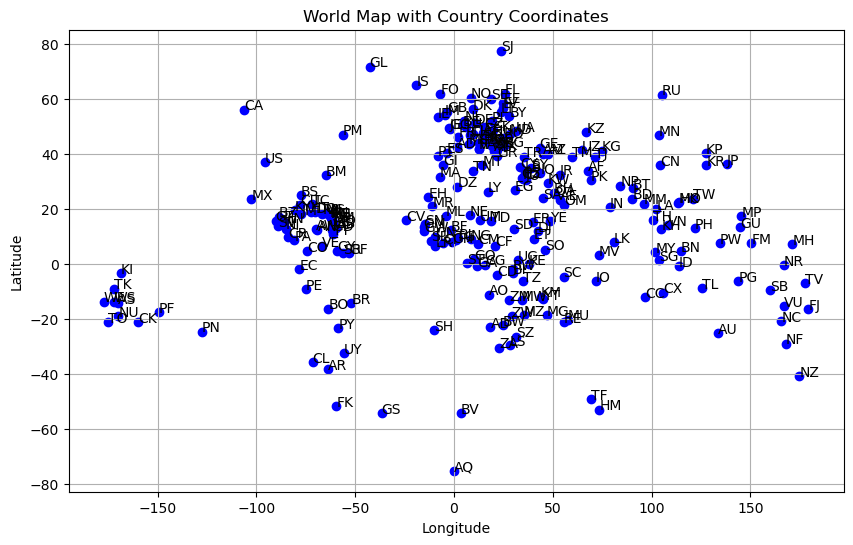

In [32]:
import matplotlib.pyplot as plt

# Giả sử bạn có dữ liệu về các quốc gia và tọa độ lat, lon tương ứng
countries = data['country']
latitudes = data['latitude']
longitudes = data['longitude']

# Vẽ bản đồ
plt.figure(figsize=(10, 6))
plt.scatter(longitudes, latitudes, marker='o', color='blue')

for i, country in enumerate(countries):
    plt.annotate(country, (longitudes[i], latitudes[i]))

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('World Map with Country Coordinates')
plt.grid(True)
plt.show()


# 1.K-MEAN

In [33]:
da = data[data.isna().any(axis=1)]
da

,country,latitude,longitude,name


In [38]:
file = "aggregation"

In [29]:
data['latitude'].fillna(round(data['latitude'].mean()), inplace=True)
data['longitude'].fillna(round(data['longitude'].mean()), inplace=True)
data['country'].fillna(data['country'].mode()[0], inplace = True)

In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
y_pred = kmeans.fit_predict(data.iloc[:,[1, 2]])
centers=kmeans.cluster_centers_


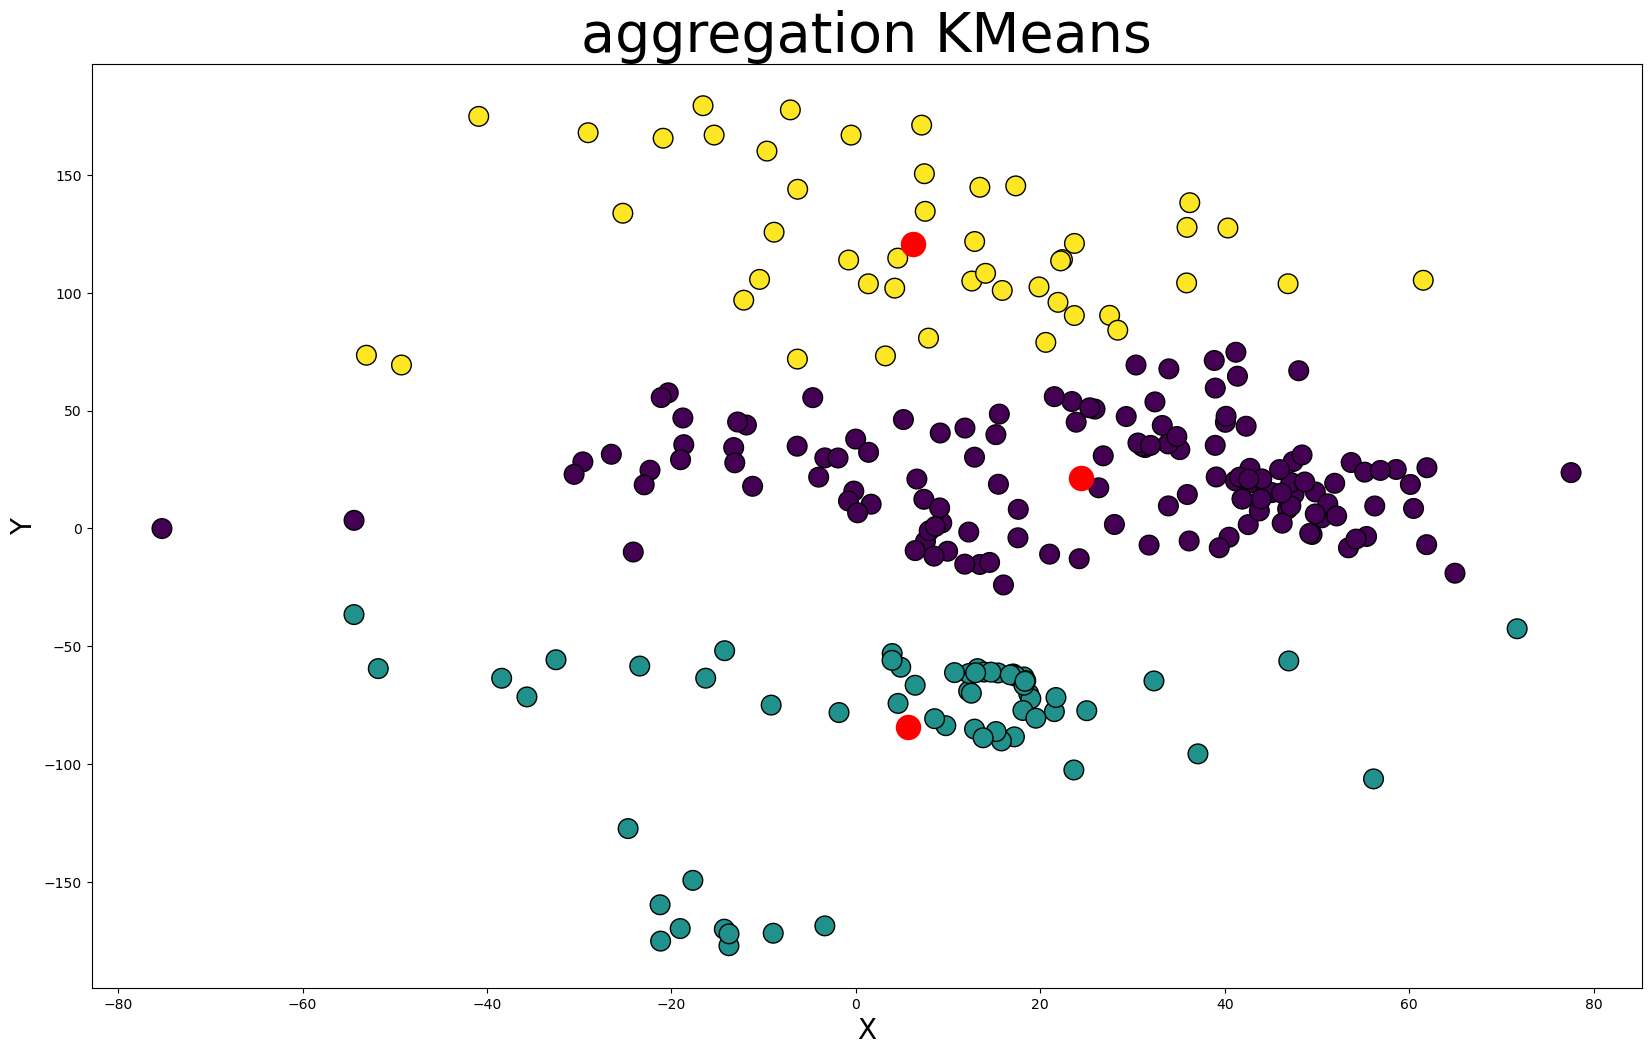

In [39]:
# Show kết quả phân cụm
plt.figure(figsize=(20,12))
plt.scatter(
    data_arr[:, 1], data_arr[:, 2],
    c=y_pred, marker='o',
    edgecolor='black', s=200
)
plt.xlabel("X", fontsize=20)
plt.ylabel("Y", fontsize=20)
plt.scatter(centers[:, 0], centers[:, 1], c='red',s=300)
plt.title(file + " KMeans", fontsize=40)
plt.show()

# 2.DBSCAN

In [41]:
def calculate_kn_distance(X,k):

    kn_distance = []
    for i in range(len(X)):
        eucl_dist = []
        for j in range(len(X)):
            eucl_dist.append(
                math.sqrt(
                    ((X[i,1] - X[j,1]) ** 2) +
                    ((X[i,2] - X[j,2]) ** 2)))
            
        eucl_dist.sort()
        kn_distance.append(eucl_dist[k])

    return kn_distance
eps_dist = calculate_kn_distance(data_arr, 5)

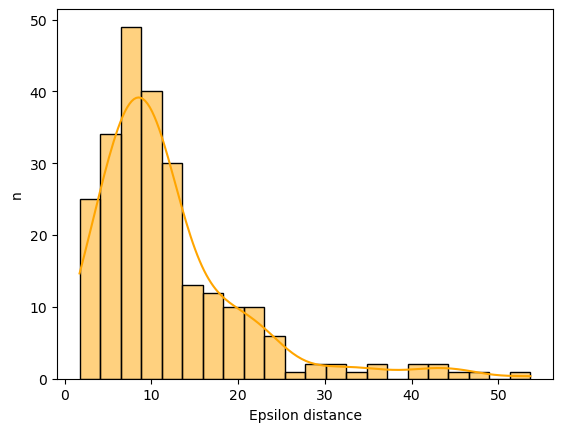

In [42]:

data_df = pd.DataFrame({'': eps_dist})

sns.histplot(x='', data=data_df, kde=True, color='orange')

plt.ylabel('n')
plt.xlabel('Epsilon distance')

plt.show()

# 3.DPC

In [43]:
dpca = DensityPeakCluster(distance_threshold=5, anormal=False)
dpca.fit(data.iloc[:,[1,2]])

In [44]:
rho = dpca.local_density()
delta, nneigh = dpca.min_neighbor_and_distance()
labels, center = dpca.collapse()



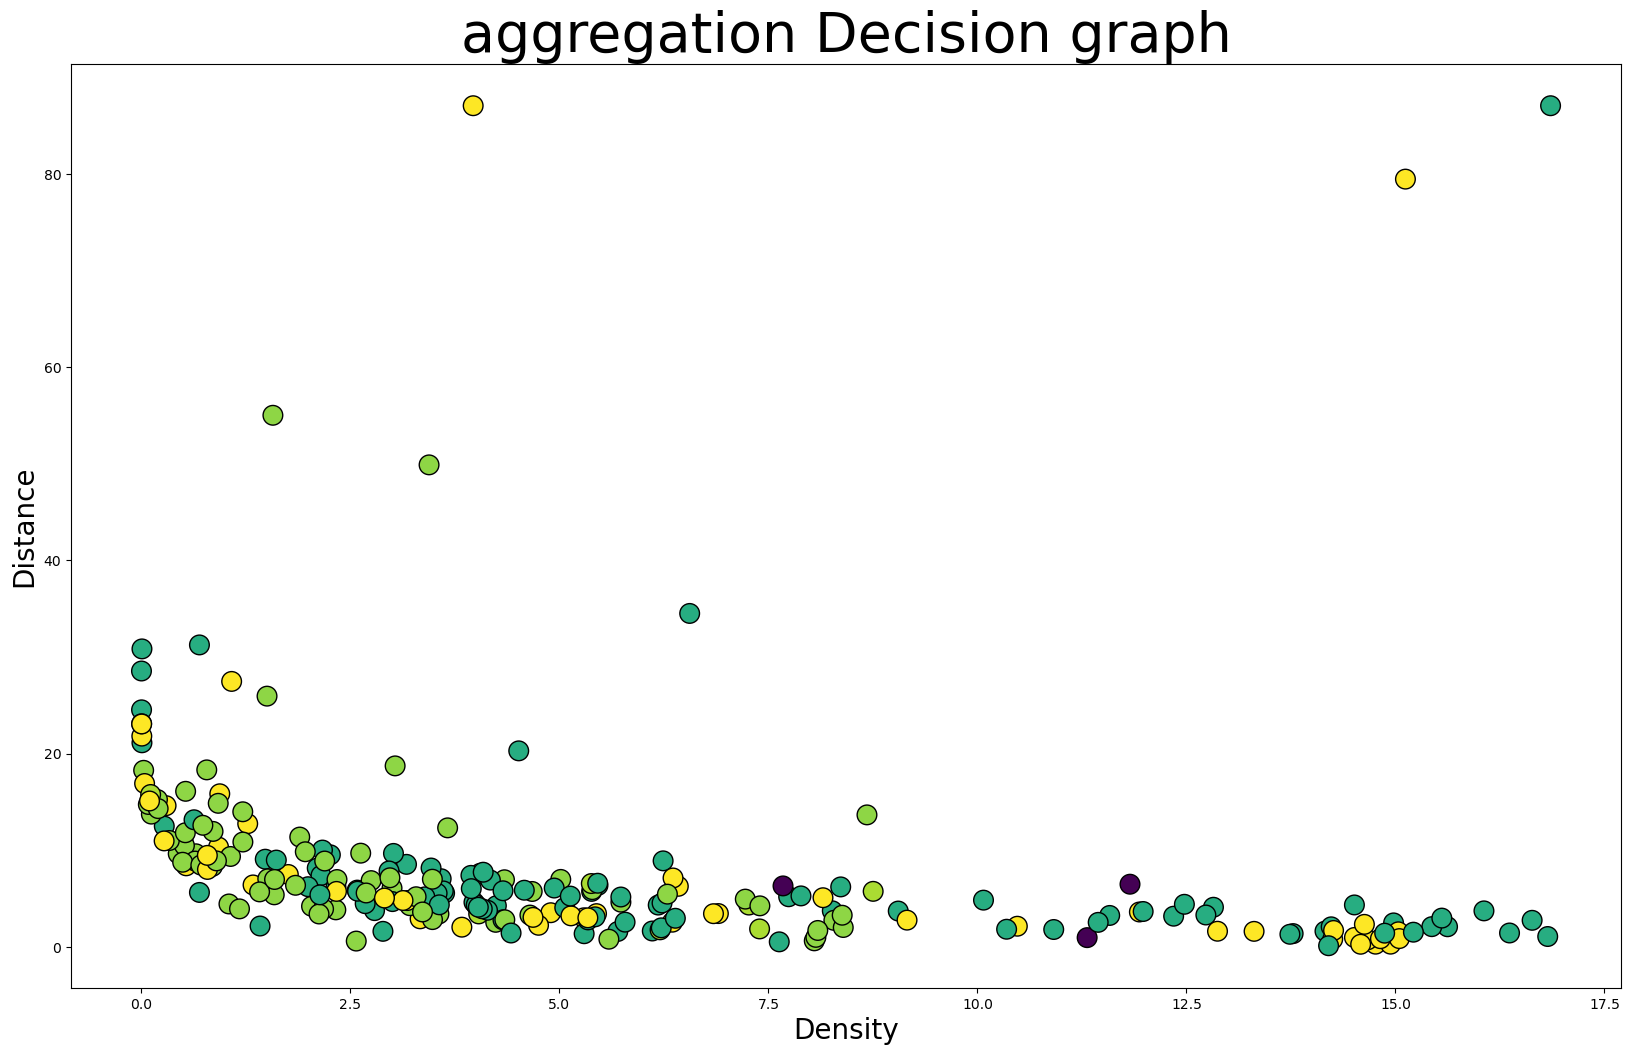

In [45]:
plt.figure(figsize=(20,12))
plt.scatter(
    rho,delta,
    c=labels, marker='o',
    edgecolor='black', s=200
)
plt.xlabel("Density", fontsize=20)
plt.ylabel("Distance", fontsize=20)
plt.title(file + " Decision graph", fontsize=40)
plt.show()

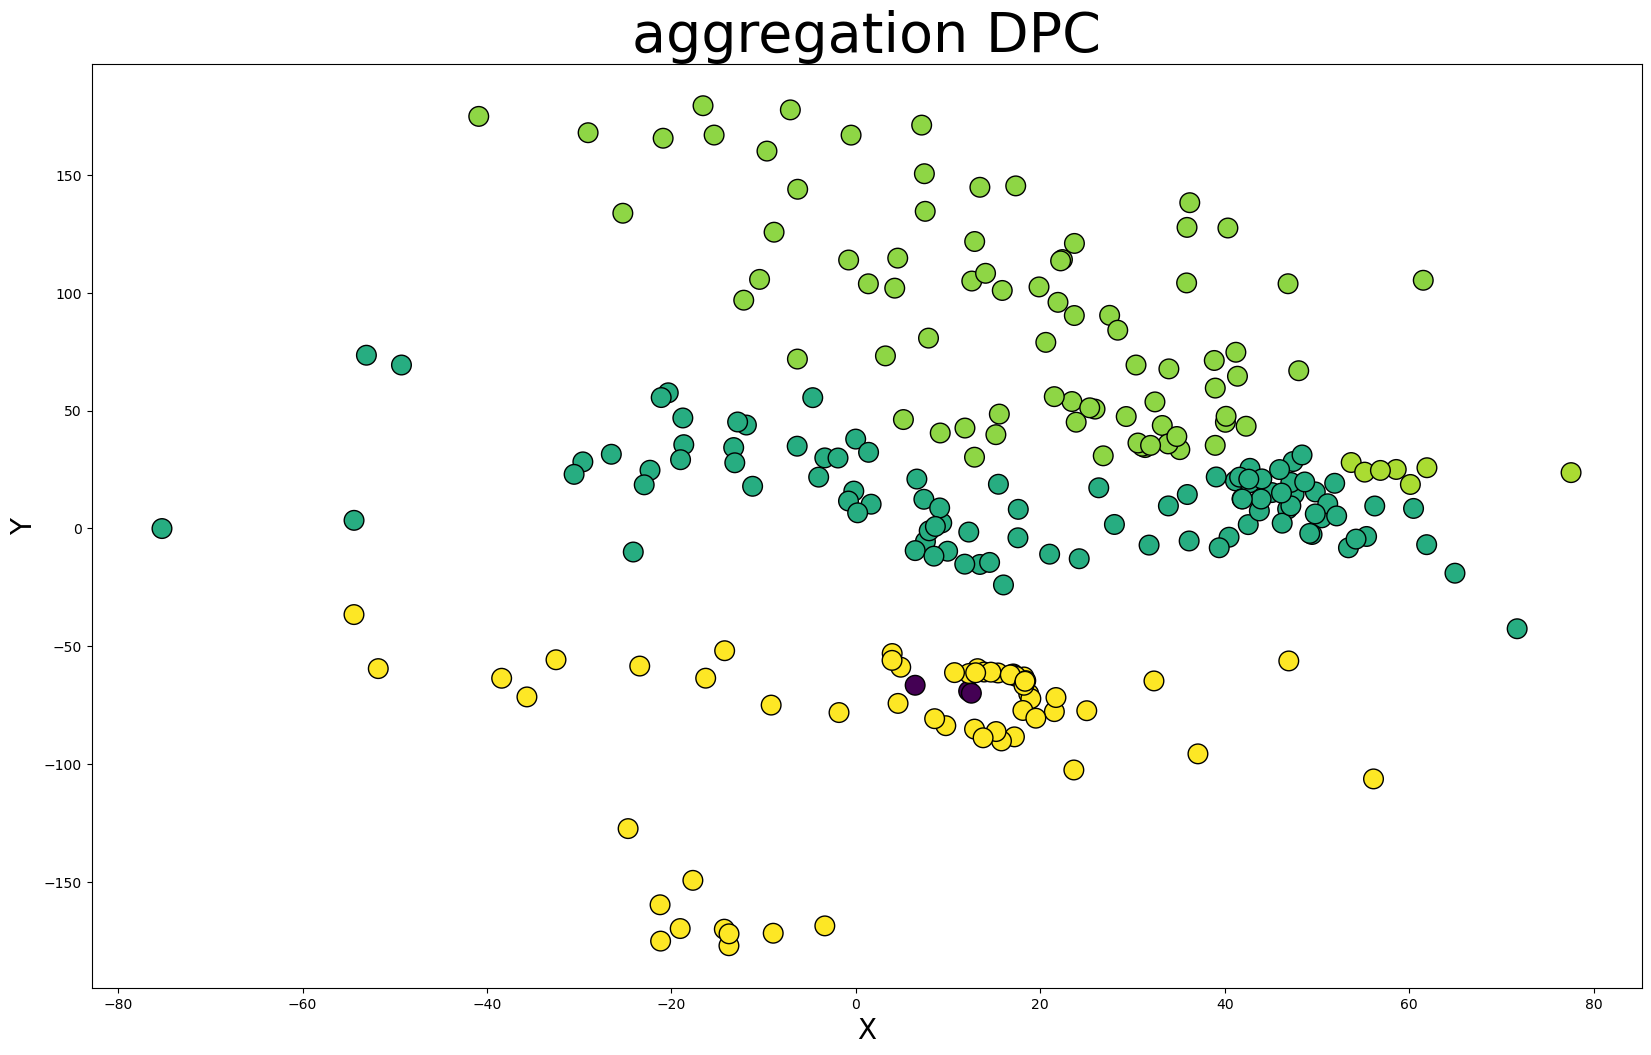

In [47]:
plt.figure(figsize=(20,12))
plt.scatter(
    data_arr[:,1],data_arr[:,2],
    c=labels, marker='o',
    edgecolor='black', s=200
)
plt.xlabel("X", fontsize=20)
plt.ylabel("Y", fontsize=20)
plt.title(file + " DPC", fontsize=40)
plt.show()

# 4. NHẬN XÉT

K-Means là phương pháp đơn giản và hiệu quả khi làm việc với dữ liệu có cấu trúc và cụm có hình cầu, nhưng không thể xử lý dữ 

DBSCAN là một lựa chọn tốt khi số lượng cụm không được biết trước và có thể xử lý dữ liệu phi cấu trúc, nhưng có thể không thể xử lý được các cụm có hình dạng phức tạp.

DPC là sự cải tiến của DBSCAN và có khả năng phát hiện các cụm có hình dạng phức tạp và xử lý dữ liệu nhiễu. Tuy nhiên, nó đòi hỏi định cấu hình tham số chính xác.